## Importation des bibliothèques

In [71]:
# Importation des librairies
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno


## Importation du jeu de données

In [91]:

client = pd.read_csv(r"../data/NewDataClient.csv")
print("Jeu de données importé ✅✅")

Jeu de données importé ✅✅


## Visualisation des données

<Axes: >

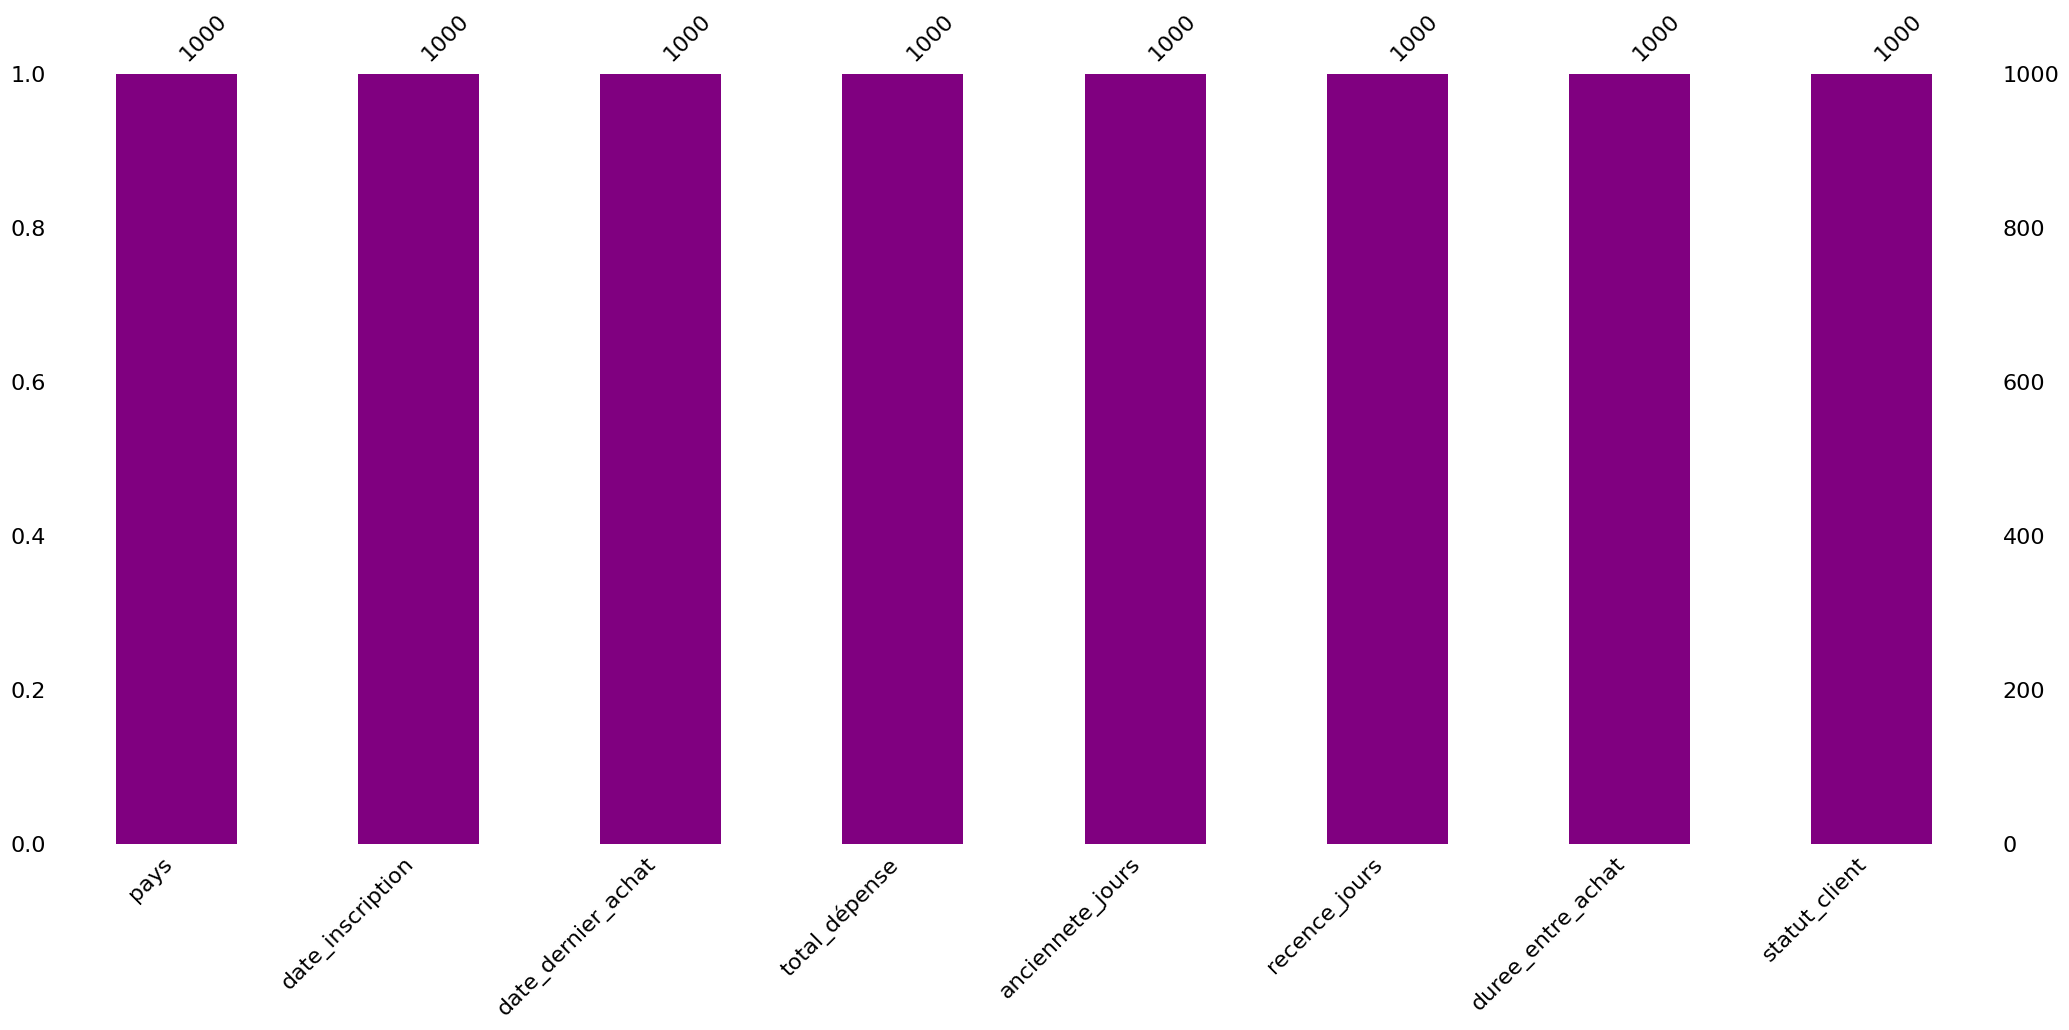

In [73]:
msno.bar(client, color="purple")

## Séparation des types de données

### Colonnes de dates

In [77]:
# Conversion des dates en format
colonnes_de_date = ["date_inscription","date_dernier_achat"]

for col in colonnes_de_date:
    client[col] = pd.to_datetime(client[col], errors="coerce")
print("Colonnes de dates converties ✅✅")

Colonnes de dates converties ✅✅


### Colonnes numériques & catégorielles

In [79]:
num_col = client.select_dtypes(include=["int64","float64"]).columns.tolist()
cat_col = client.select_dtypes(include=["object"]).columns.tolist()

## Distribution des colonnes numériques

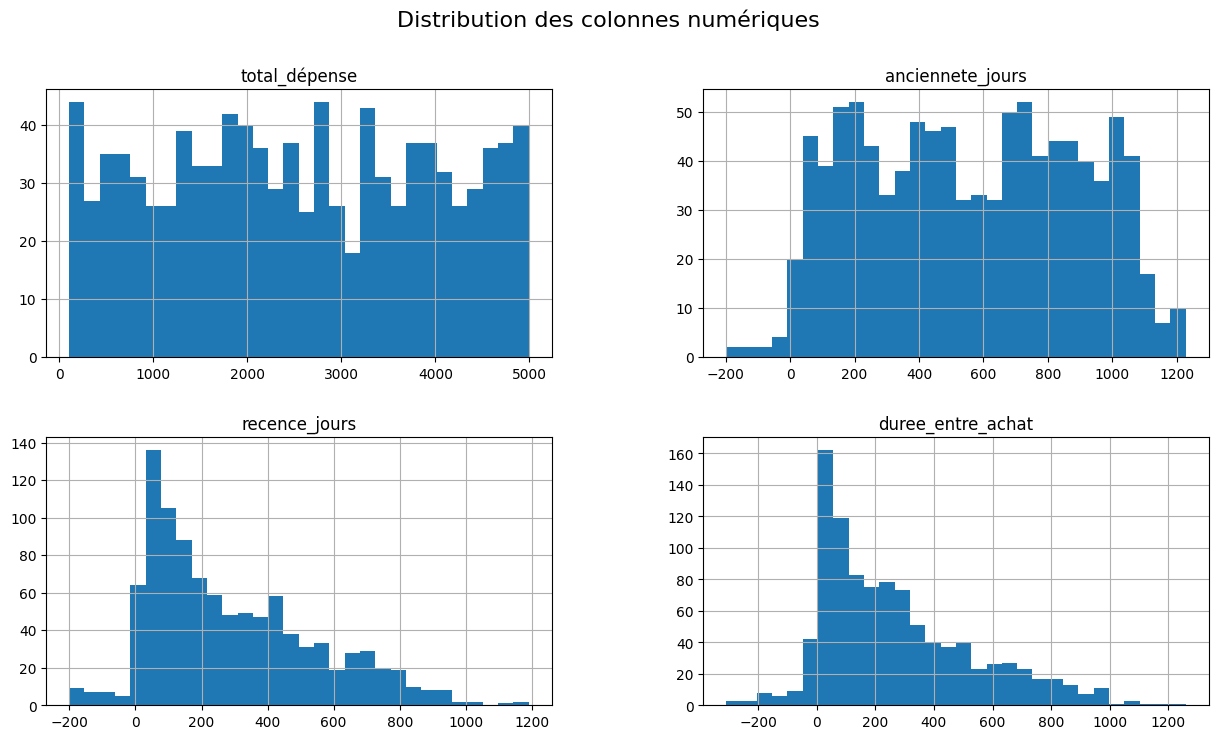

In [81]:
client[num_col].hist(bins=30, figsize=(15,8))
plt.suptitle("Distribution des colonnes numériques",fontsize=16)
plt.show()

## Carte de Chaleur

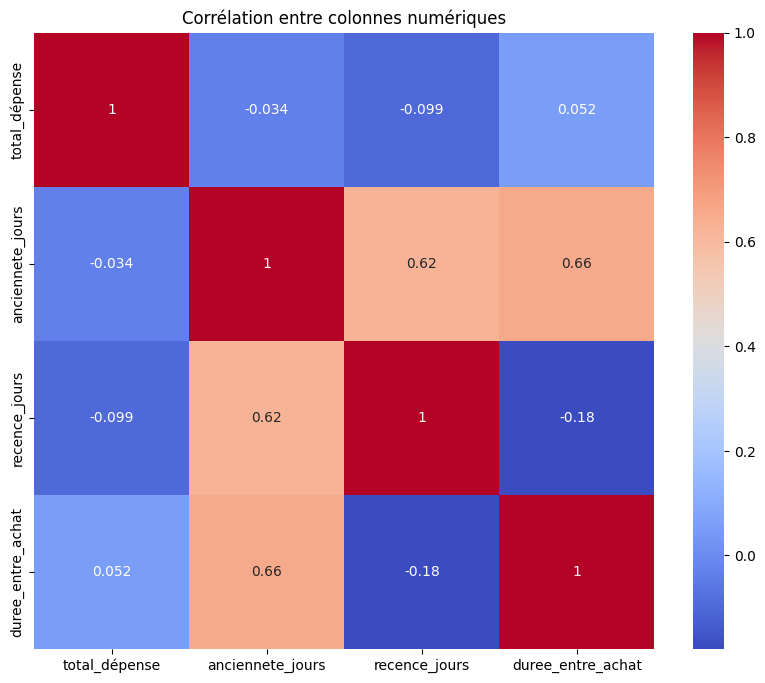

In [82]:
plt.figure(figsize=(10,8))
sns.heatmap(client[num_col].corr(), annot=True, cmap="coolwarm")
plt.title("Corrélation entre colonnes numériques")
plt.show()

## Distribution entre colonnes catégorielles

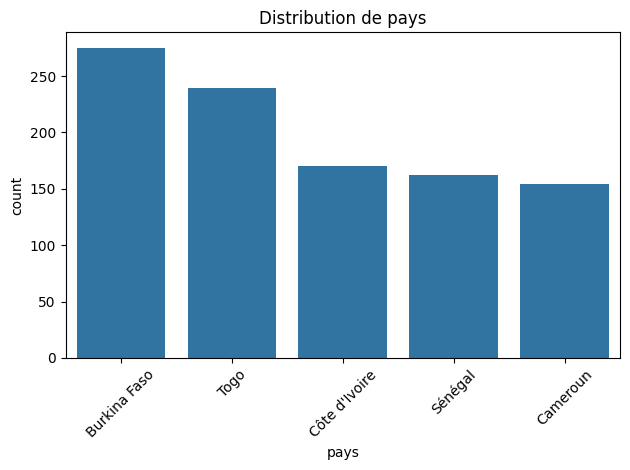

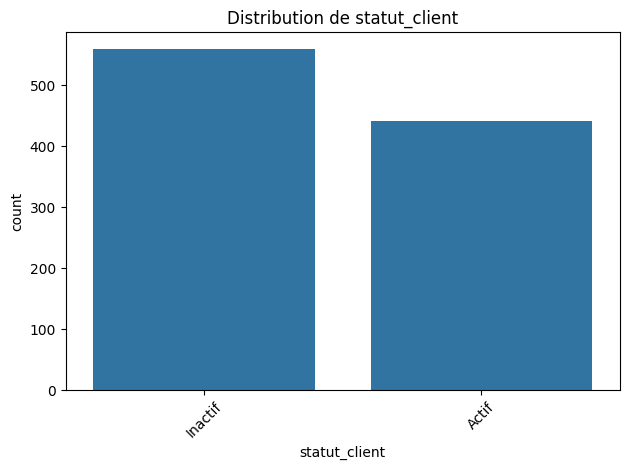

In [84]:
for col in cat_col: 
    sns.countplot(data=client, x=col, order=client[col].value_counts().index)
    plt.title(f"Distribution de {col}")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

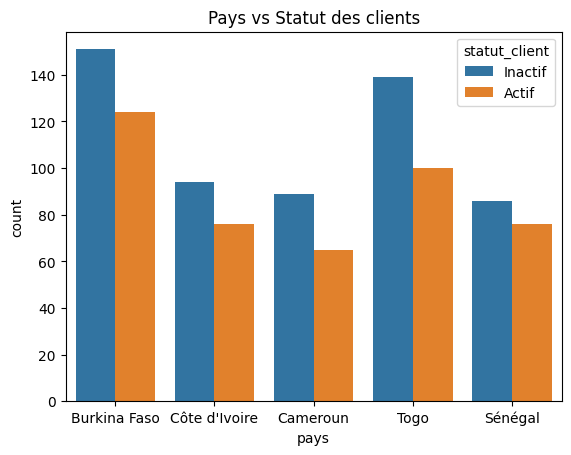

In [85]:
sns.countplot(client, x=client['pays'], hue=client["statut_client"])
plt.title("Pays vs Statut des clients")
plt.show()

## Visualisation des données

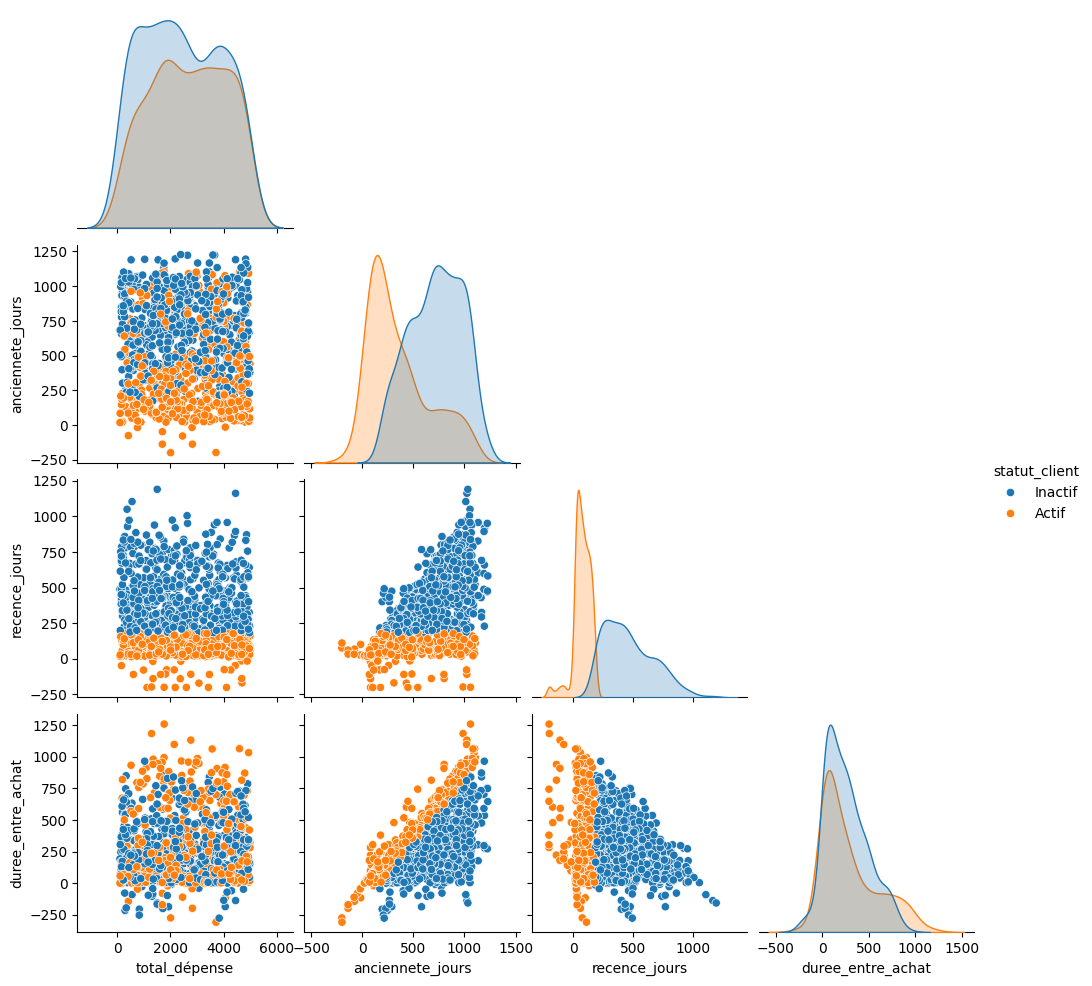

In [86]:
sns.pairplot(client, hue="statut_client", diag_kind="kde", corner=True)
plt.show()

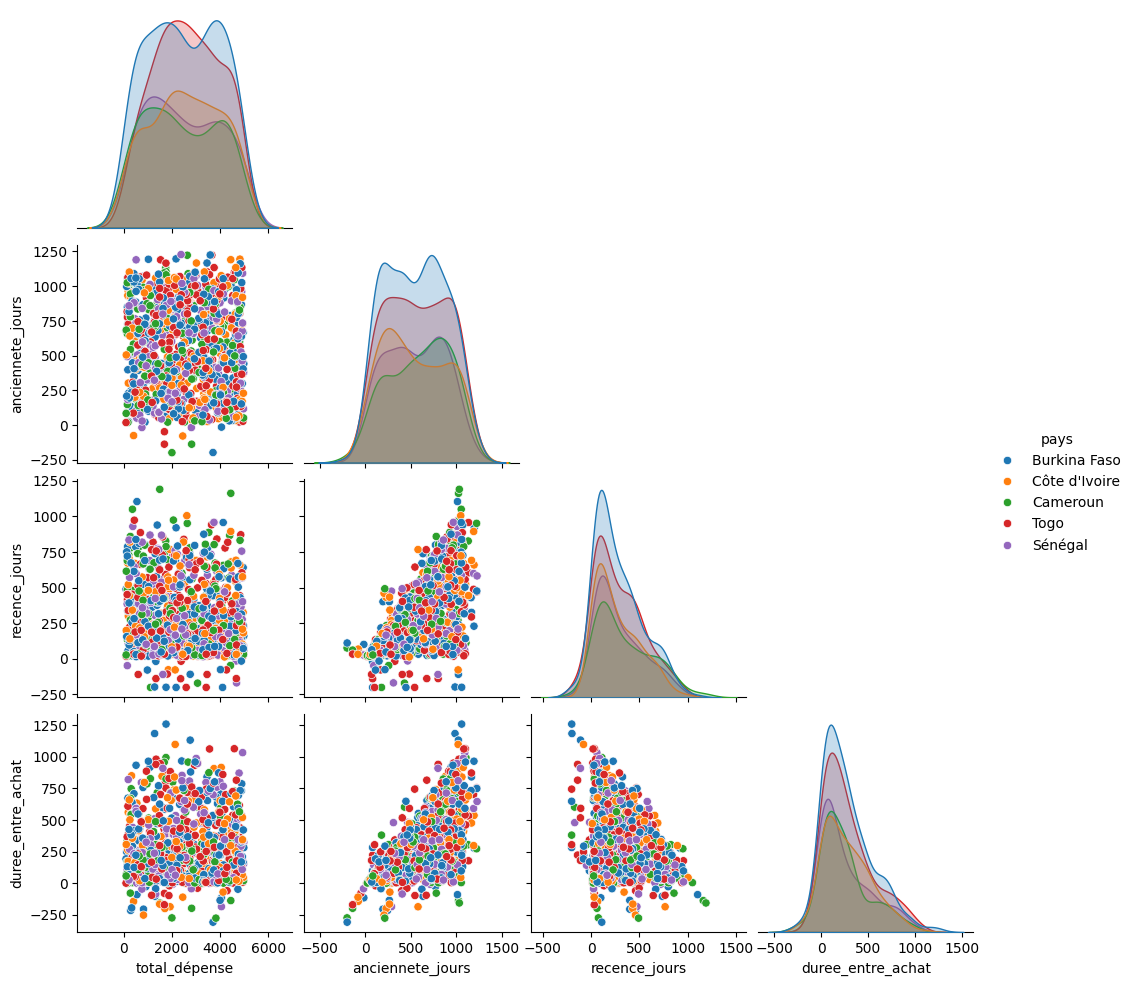

In [87]:
sns.pairplot(client, hue="pays", diag_kind="kde", corner=True)
plt.show()